In [1]:
from IPython.display import HTML

msj="Mostrar código en python."
HTML('''
    <script>

    code_show=true; 
    
    function code_toggle() {
     if (code_show){
     //$('div.input').map( (i,x) => {return x.id=i})
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    }

    $( document ).ready(code_toggle);
    </script>

    <form action="javascript:code_toggle()"><input type="submit" value="%s"></form>
    
'''%(msj))

# <center> Hablando en Binario
_________________________________________________________

El procesamiento de datos dentro de un computador tiene como base las **ALU(Arithmetic Logic Unit)** o unidades aritméticas lógicas. Una ALU debe procesar números usando el mismo formato que el resto del circuito digital. 

Para los procesadores modernos, este formato casi siempre es la representación del número binario de complemento a dos conocido como **Formato IEEE 754**. Las primeras computadoras usaron una amplia variedad de sistemas de numeración, incluyendo complemento a uno, formato signo-magnitud, e incluso verdaderos sistemas decimales, con diez tubos por dígito [Ver más](https://es.wikipedia.org/wiki/Unidad_aritm%C3%A9tica_l%C3%B3gica#Operaciones_simples).

## Sistemas de numeración 

Un sistema de numeración es un conjunto de reglas y símbolos (por ejemplo los dígitos) que permiten construir un conjunto numérico, por ejemplo nuestro sistema decimal, el más usado en la actualidad, que nos permite organizar los números como la suma de los dígitos por potencias de 10: 

$$N_{b10} = \sum_{n=Q}^{n=P} a_n 10^n \label{eq1}\tag{1}\text{,}$$ 

donde $\sum$ es el símbolo matemático que representa la suma de la secuencia en n desde un valor Q hasta P, donde $n \in Z$, tal que n puede ser positivo o negativo y $a_n \in \{0,1,2,3,4,5,6,7,8,9\}$, es decir $a_n$ es un dígito. 

Ejemplo:

$$340.78 = 3*10^2 + 4*10^1 + 0*10^0 +7*10^{-1} + 8*10^{-2} \text{.}$$

En este caso vemos que P=2 y Q=-2

## Sistema binario

El sistema binario sigue unas reglas parecidas al sistema decimal descrita en Eq. 1, pero sus dígitos sólo pueden ser 0 o 1 por lo tanto:

$$N_{b2} =  \sum_{n=Q}^{n=P}  a_n 2^n \label{eq2}\tag{2}\text{,}$$

donde $n \in Z$, enteros desde un valor Q hasta P $a_n \in \{0,1\}\text{.}$ 

Ejemplo:

$$100.01 = 1*2^2 + 0*2^1 + 0*2^0 +0*2^{-1} + 1*2^{-2} \text{.}$$

En este caso vemos que P=2 y Q=-2

## Relación entre los sistemas de numeración 


Para pasar de un sistema de numeración a otro tenemos que encontrar un conjunto de potencias de la **base a la que queremos pasar** y los dígitos que acompañan a esa potencia tal que la suma nos dé el número en **la base inicial**. Por ejemplo si queremos pasar de **b10** (base 10) a **(b2)** (base 2),tenemos qué

$$N_{b10} =  \sum_{n=Q}^{n=P}  a_n 2^n \label{eq3}\tag{3}\text{.}$$ 

Dado a que n puede ser negativo y positivo, las potencias positivas sumaran la parte entera y las negativas la parte fraccionaria. Para ello dividamos el número en su parte entera y fraccionaria, de manera que tengamos:

$$N_{b10} = Z_{b10} + D_{b10} = \sum_{0}^{P} a_n 2^n + \sum_{Q}^{-1} a_n 2^n \text{,}$$ 

lo cual sería:

$$Z_{b10} = \sum_{0}^{P} a_n 2^n \label{eq4}\tag{4}\text{,}$$

$$D_{b10} = \sum_{Q}^{-1} a_n 2^n \label{eq5}\tag{5}\text{.}$$ 

### Entero base 10 a Entero base 2

<div class="alert alert-block alert-info">
<b>Para tener en cuenta:</b>
Los enteros son número positivos y negativos, en este caso la representación se hace con su valor absoluto es decir tanto para 10 como para -10 la representación es la misma $1*10^1 + 0*10^0$ pero son acompañados por signos diferentes. Por lo tanto si vamos a pasar un número entero en base 10 trabajamos con su valor absoluto.
</div>

Para hallar los dígitos adecuados tenemos varios métodos, por asignación de potencias usando una tabla, por división o por logaritmos.

#### Tabla de potencias

En este caso el proceso es simple pero no útil en casos de números muy grandes. El método consiste en encontrar la potencias una a una usando una tabla de potencias:

In [90]:
import numpy as np
import pandas as pd
from IPython.display import YouTubeVideo

power = np.arange(10)
two_power_str = ["2^"+str(p) for p in power] 
two_power = 2**power
pd.DataFrame({"Potencia":two_power_str,"Valor":two_power})

,Potencia,Valor
0,2^0,1
1,2^1,2
2,2^2,4
3,2^3,8
4,2^4,16
5,2^5,32
6,2^6,64
7,2^7,128
8,2^8,256
9,2^9,512


Ubicar nuestro número en esa tabla, por ejemplo Z=149, que tendría una resta válida (de resultado positivo) con $2^7$, luego el resultado de esa resta vuelve a buscar un resta válida y así obtendremos representación adecuada:

In [3]:
N=149
v=[]
m1 = [N]
for i in range(10):   
    m2 = m1[i] - two_power[-(i+1)]
    v.append(m2 if m2>=0 else -1)
    m1.append(m1[i] if v[i]==-1 else m2)
string = ["No" if v[i]==-1 else "%d-%d=%d"%(m1[i],two_power[-i-1],v[i]) for i in range(10)]
print("El número",N,"en base dos es:",np.heaviside(v,1).astype(int))
pd.DataFrame({"Potencia":two_power_str[::-1],"Valor":two_power[::-1],
              "Resta válida":string,"Representación":np.heaviside(v,1).astype(int)})       

El número 149 en base dos es: [0 0 1 0 0 1 0 1 0 1]


,Potencia,Valor,Resta válida,Representación
0,2^9,512,No,0
1,2^8,256,No,0
2,2^7,128,149-128=21,1
3,2^6,64,No,0
4,2^5,32,No,0
5,2^4,16,21-16=5,1
6,2^3,8,No,0
7,2^2,4,5-4=1,1
8,2^1,2,No,0
9,2^0,1,1-1=0,1


El problema de este método es que para números grandes se vuelve muy tedioso hacer grandes grandes tablas. 

#### División

El método de división nos sugiere que tomemos nuestro número Z=149, y dividamos por la base 2. Ya que los dígitos siempre son menores que su base (Ej, $0...9 <10$) y aprovechando la regla:

> Una división entre dos enteros N y M puede representarse como $\frac{N}{M} = C + \frac{R}{M}$, donde C es el cociente (número entero) y R el residuo(número entero)

Tendríamos

$$\dfrac{Z_{b10}}{2} = \sum_{0}^{P} \dfrac{a_n}{2} 2^n $$ 

Dado a que $a_n$ es un dígito menor que la base esta fracción será menor que 1 para la potencia $n=0$.  tenemos que:  

$$\dfrac{Z_{b10}}{2}= C_{b10} + \dfrac{R_{b10}}{2} = \dfrac{a_0}{2} + \sum_{n=1} \dfrac{a_n}{2} 2^n $$

Entonces, tendríamos un entero más un número racional menor que uno, dado que sólo $a_0/2$ puede ser racional, entonces el residuo sería el último dígito. Ahora volvemos a tener la misma situación:

$$\dfrac{C_{b10}}{2}= \sum_{n=1} \dfrac{a_n}{2} 2^n $$

Por lo cuál un método simple para pasar un entero de una base a otra es dividir por la base cada cociente resultante hasta que sea posible y guardando los residuos para ser organizados del último al cociente final. 

In [4]:
N=149
c = [N]
r = []
i=0
while c[-1]>1:   
    c.append(c[i]//2)
    r.append(c[i]%2)
    i+=1
r.append(c[-1])
print("El número",N,"en base dos es:",r[::-1])
pd.DataFrame({"Operación":["%d/2"%(c[i]) for i in range(len(c))],
              "Cociente":["No" if i==len(c)-1 else c[i+1] for i in range(len(c))],"Residuo":r})

El número 149 en base dos es: [1, 0, 0, 1, 0, 1, 0, 1]


,Operación,Cociente,Residuo
0,149/2,74,1
1,74/2,37,0
2,37/2,18,1
3,18/2,9,0
4,9/2,4,1
5,4/2,2,0
6,2/2,1,0
7,1/2,No,1


#### Logaritmo

A pesar que el anterior método es bastante simple y fácil de programar, para números muy grades o pequeños puede ser demasiado complicado. Combinando el primer método y el segundo podemos hallar la representación binaria con mayor facilidad, sólo necesitamos saber cuál es la máxima potencia posible y desde allí restar y volver a encontrar la potencia, es un proceso en donde nos interesan los números fuera del 0, que no aporta a la suma, en el caso del sistema binario es muy bastante útil y práctico. 

Es posible saber la potencia máxima posible con la que puede restarse nuestro número si este puede escribirse como $N=2^k$, siendo k un número real positivo, dado a que buscamos $N \geq 2^n$ entonces $2^k \geq 2^n$ lo que significa que $k \geq n$, si encontramos k y lo redondeamos al entero menor podremos hallar la representación más rápido. 

$$k = \log_{2} N = \dfrac{\ln N}{\ln 2} = \dfrac{\log N}{\log 2}$$

In [5]:
import math

n = []
k = []
resta = [N]
i=0
while resta[i]>0:
    k.append((math.log(resta[i])/math.log(2)))
    n.append(math.trunc(k[i]))
    resta.append(resta[i] - 2**n[i])
    i+=1

bin_str=[0]*n[0]
for p in n:
    bin_str[p-1] = 1
print("El número",N,"en base dos es:",bin_str[::-1])
pd.DataFrame({"Operación":["log(%d)/log(10)"%(resta[i]) for i in range(len(resta)-1)],
              "k":k,"n":n,"Falta":[resta[i] if i <= len(resta)-1 else 0 for i in range(1,len(resta))]})

El número 149 en base dos es: [1, 0, 0, 1, 0, 1, 0]


,Operación,k,n,Falta
0,log(149)/log(10),7.219169,7,21
1,log(21)/log(10),4.392317,4,5
2,log(5)/log(10),2.321928,2,1
3,log(1)/log(10),0.000000,0,0


### Enteros base 10 a otras bases

In [6]:
N=149
c = [N]
r = []
i=0
while c[-1]>1:   
    c.append(c[i]//5)
    r.append(c[i]%5)
    i+=1
r.append(c[-1])
print("El número",N,"en base 5 es:",r[::-1])
pd.DataFrame({"Operación":["%d/5"%(c[i]) for i in range(len(c))],
              "Cociente":["No" if i==len(c)-1 else c[i+1] for i in range(len(c))],"Residuo":r})

El número 149 en base 5 es: [1, 0, 4, 4]


,Operación,Cociente,Residuo
0,149/5,29,4
1,29/5,5,4
2,5/5,1,0
3,1/5,No,1


In [7]:
N=149
c = [N]
r = []
i=0
while c[-1]>1:   
    c.append(c[i]//8)
    r.append(c[i]%8)
    i+=1
r.append(c[-1])
print("El número",N,"en base 8 es:",r[::-1])
pd.DataFrame({"Operación":["%d/8"%(c[i]) for i in range(len(c))],
              "Cociente":["No" if i==len(c)-1 else c[i+1] for i in range(len(c))],"Residuo":r})

El número 149 en base 8 es: [0, 2, 2, 5]


,Operación,Cociente,Residuo
0,149/8,18,5
1,18/8,2,2
2,2/8,0,2
3,0/8,No,0


### Ejercicios enteros base 10 a base 2

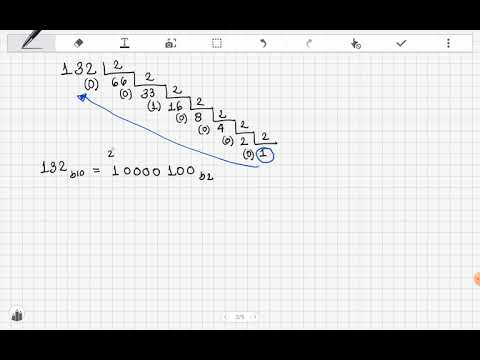

In [91]:
from IPython.display import HTML
YouTubeVideo('XSF4z7l3Pf0')
 

### Fraccionarios base 10 a fraccionarios base 2

Para los números menores de 1 podemos aplicar más o menos los mismos métodos, tan sólo cambia el segundo método, **donde no dividimos sino que multiplicamos**, pero hay una diferencia principal y es que no podemos conocer la potencia mínima para representar un número real menor de 1 e incluso es posible que no podamos hacerlo con exactitud. 

Los número enteros tiene la regla del cociente y residuo, cada vez que dividimos un número entero en la base a la que vamos a transformar se genera un par (C,R), ambos enteros, el residuo siempre es menor que la base y es un dígito en un orden especifico y el cociente puede volver a dividirse hasta que la división no pueda darnos un entero, entonce el último cociente (que obviamente es menor que la base) es tomado con los residuos y nos da la representación que queremos.

Pero con los racionales menores que 1, tenemos la serie

$$\sum_{n=-1} a_n 2^n \text{,} $$
que es una serie geométrica, tal que si todos los $a_n=1$ converge

$$\sum_{1}^M (1/2)^{k-1} = 1-2*(0.5)^M \text{,} $$

Entonces tenemos que la suma hasta cada potencia sería: 

In [9]:
pd.DataFrame({"2^n":[2**(-m) for m in range(1,10)],"Suma 2^n":[1-2*(0.5)**m for m in range(2,11)]},index=np.arange(-1,-10,-1,dtype=np.int)).T

,-1,-2,-3,-4,-5,-6,-7,-8,-9
2^n,0.5,0.25,0.125,0.0625,0.03125,0.015625,0.007812,0.003906,0.001953
Suma 2^n,0.5,0.75,0.875,0.9375,0.96875,0.984375,0.992188,0.996094,0.998047


Si partimos la serie en los valores acumulados por secciones, es probable que no podamos representar todos os fraccionarios con pocos números después de la coma, incluso es posible que tengamos que aproximar o redondear pues podríamos caer en un bucle infinito esperando poder hallar la representación exacta. Por ejemplo, el fraccionario 0.51

In [10]:
N =np.longdouble(0.51) 
r = []
i=0
resta=[N]
mul = []
while resta[-1]>0 and i<100:   
    mul.append(resta[i]*np.longdouble(2.0))
    r.append(np.trunc(mul[i]))
    resta.append(mul[i]-r[i]) 
    i+=1

print("El número",N,"en base 2 es 0.",r)
pd.DataFrame({"Operación":["%f*2"%(resta[i]) for i in range(len(resta)-1)],
              "Resultado":mul,"Valores":r}).T


El número 0.5100000000000000089 en base 2 es 0. [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0]


,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
Operación,0.510000*2,0.020000*2,0.040000*2,0.080000*2,0.160000*2,0.320000*2,0.640000*2,0.280000*2,0.560000*2,0.120000*2,...,0.040039*2,0.080078*2,0.160156*2,0.320312*2,0.640625*2,0.281250*2,0.562500*2,0.125000*2,0.250000*2,0.500000*2
Resultado,1.02,0.04,0.08,0.16,0.32,0.64,1.28,0.56,1.12,0.24,...,0.0800781,0.160156,0.320312,0.640625,1.28125,0.5625,1.125,0.25,0.5,1
Valores,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1


Este fraccionario necesita de 51 números (dígitos entre 0 y 1) para poder representar con exactitud computacional el fraccionario, porque por supuesto cuando las operaciones tengan más de 16 dígitos después de la coma, el valor será naturalmente truncado, gracias al formato de representación de los procesadores actuales. 

### Ejercicios con fraccionarios en base 10 a base 2

In [11]:
HTML("""  
    <video alt="test" controls>
        <source src="video2.mp4" type="video/mp4">
    </video>
""") 


## Números grandes y pequeños

Para los números grandes y pequeños lo más adecuado es usar el método logarítmico, siendo el número representado en su notación científica. 

$$ A \times 10^P =2^k \text{  ,  }  k=\dfrac{\log(A)+P}{\log(2)} \text{  ,  } n=[k]\\
A \times 10^P = M \times 2^n \text{  Donde  } M = \dfrac{A \times 10^P}{2^n}$$



Por ejemplo vamos a pasar a binario la masa de un electrón y la masa de la tierra.

In [30]:
def errorNotList(x):
    if not isinstance(x,list):
        raise ValueError("Not list!")

def errorNotNumber(x):
    if not (isinstance(x,float) or isinstance(x,int)):
        raise ValueError("Not number!")       

def errorNotString(x):
    if not isinstance(x,str):
        raise ValueError("Not string!")        
        
def intToBinary(number):
    errorNotNumber(number)
    if number<0:
        return('-' + bin(number)[3:])
    else:
        return(bin(number)[2:])

def binaryToInt(binary):
    errorNotString(binary)
    return(int(binary,2))

def floatToBinary(number,limit):
    errorNotNumber(number) or errorNotNumber(limit) 
    if number>=1:
        raise ValueError("The number must be a fraction")
    if limit<=0:
        return ""
    new_number=number
    result=""
    for i in range(0,limit):
        new_number=new_number*2
        if new_number==2:
            result+="0"
        else:
            result+=str(int(new_number))
        new_number=new_number-int(new_number)
    return(result)

def binaryToFloat(binary):
    errorNotString(binary)
    result=[int(x)*2**(-1*(i+1)) for i,x in enumerate(binary)]
    number=sum(result)
    return(number)

def signIntToStr(sign):
    errorNotNumber(sign)
    return("0" if sign==0 else "1")

def signIntToChar(sign):
    errorNotNumber(sign)
    return("+" if sign==0 else "-")

def signCharToInt(sign):
    errorNotString(sign)
    return(0 if sign=="+" else 1)

def numberToBinary(number,limit):
    errorNotNumber(number) or errorNotNumber(limit)
    nsign= 0 if number > 0 else 1 
    number_int=int(abs(number))
    number_decimal=abs(number)-number_int
    return(signIntToChar(nsign)+intToBinary(number_int)+"."+floatToBinary(number_decimal,limit))

def binaryToNumber(binary):
    errorNotString(binary)
    return((-1)**signCharToInt(binary[0])*(binaryToInt(binary[1:].split(".")[0])+ \
    binaryToFloat(binary[1:].split(".")[1])))    

In [42]:
HTML("""
    <video alt="test" controls>
        <source src="video3.mp4" type="video/mp4">
    </video>
""") 

In [32]:
N=9.1e-31
k=math.log(N)/math.log(2)
n=math.floor(k)
M=N/2**n
print("La masa de un electrón es:",N)
print("La mayor potencia es:",n)
print("El número en notación binaria es %fx2^(%d)"%(M,n))
print("Y el número en binario (con 10 dígitos después de la coma) es:",numberToBinary(M,10),"x2^",intToBinary(n))

La masa de un electrón es: 9.1e-31
La mayor potencia es: -100
El número en notación binaria es 1.153562x2^(-100)
Y el número en binario (con 10 dígitos después de la coma) es: +1.0010011101 x2^ -1100100


In [33]:
N=5.972e24
k=math.log(N)/math.log(2)
n=math.trunc(k)
M=N/2**n
print("La masa de la Tierra es:",N)
print("La mayor potencia es:",n)
print("El número en notación binaria es %fx2^(%d)"%(M,n))
print("Y el número en binario (con 10 dígitos después de la coma) es:",numberToBinary(M,10),"x2^",intToBinary(n))

La masa de la Tierra es: 5.972e+24
La mayor potencia es: 82
El número en notación binaria es 1.234981x2^(82)
Y el número en binario (con 10 dígitos después de la coma) es: +1.0011110000 x2^ 1010010


## Operaciones con binarios 

### Suma y Resta de binarios

La suma es una operación básica en donde se adicionan dos o más cantidades, que pueden ser de distintos conjuntos numéricos, para formar un total. Por ejemplo $5 + (-19) = -14$, donde es sistema es base 10 y es la suma de un natural y un entero negativo. 

En los binarios también tenemos esta operación donde: 

| + | 0  | 1  |  
|:-:|:-: |:-: |
| 0  |  0 | 1 |
| 1  |  1 | 10|

Al igual que en el sistema decimal cunado sumamos dos dígitos y debemos movernos en las potencias de 10, hacemos lo mismo en el binario sabemos que $1+1=2$ pero en el sistema binario esto se representa como $10$ por lo tanto el proceso es similar, donde ese 1 se guarda para la operación hacia la izquierda.

En contraposición la resta tiene la relación:

| - | 0  | 1  |  
|:-:|:-: |:-: |
| 0  |  0 | 1 |
| 1  |  -1 | 0|

Ese -1 muchas veces crea problemas, en el sistema decimal cuando se restaba $23 - 9$ donde 9 es mayor a 3, se decía que 2 le prestaba $1*10^1$ tal que se operaba $13 - 9 = 4$ y el $2$ se transformaba en 1. Es lo mismo en el mundo binario pero puede ser más complicado de ejecutar. 

### Multiplicación de binarios

La multiplicación en binario es más fácil que en cualquier otro sistema de numeración. Como los factores de la multiplicación sólo pueden ser CEROS o UNOS, el producto sólo puede ser CERO o UNO. En otras palabras, las tablas de multiplicar del cero y del uno son muy fáciles de aprender:

| * | 0  | 1  |  
|:-:|:-: |:-: |
| 0  |  0 | 0 |
| 1  |  0 | 1|

In [85]:
HTML("""  
    <video alt="test" controls>
        <source src="video4.mp4" type="video/mp4">
    </video>
""") 


## Ejercicios de binarios con respuestas

In [86]:
valores_b10 = np.round(np.random.normal(10,100,5),4)
valores_b2 = [ numberToBinary(v,10) for v in valores_b10]
print('Decimal a binario')
pd.DataFrame({'decimal':valores_b10,'binario':valores_b2})

Decimal a binario


,decimal,binario
0,17.9714,+10001.1111100010
1,191.5581,+10111111.1000111011
2,51.9705,+110011.1111100001
3,105.5169,+1101001.1000010001
4,141.3205,+10001101.0101001000


In [87]:
valores_b10 = np.round(np.random.normal(10,100,5),4)
temp = [numberToBinary(v,4) for v in valores_b10]
valores_b2 = [binaryToNumber(t) for t in temp]
print('Binario a decimal')
pd.DataFrame({'binario':temp,'decimal':valores_b2})

Binario a decimal


,binario,decimal
0,-1011001.0000,-89.0000
1,+1101.1001,13.5625
2,-10001000.0101,-136.3125
3,-11000110.0101,-198.3125
4,+1111100.1100,124.7500


In [88]:
valores_b10_1 = np.abs(np.round(np.random.normal(10,100,5),0))
valores_b10_2 = np.abs(np.round(np.random.normal(10,100,5),0))
suma_b10  = valores_b10_1 + valores_b10_2
resta_b10 = valores_b10_1 - valores_b10_2
mul_b10   = valores_b10_1 * valores_b10_2

valores_b2_1 = [ numberToBinary(v,0) for v in valores_b10_1]
valores_b2_2 = [ numberToBinary(v,0) for v in valores_b10_2]

suma_b2  =  [ numberToBinary(v,0) for v in suma_b10]
resta_b2 =  [ numberToBinary(v,0) for v in resta_b10]
mul_b2   =  [ numberToBinary(v,0) for v in mul_b10]
print('Operaciones entre binarios')
pd.DataFrame({'número 1':valores_b2_1,'número 2':valores_b2_2,
              'suma':suma_b2,'resta':resta_b2,'mul':mul_b2})

Operaciones entre binarios


,número 1,número 2,suma,resta,mul
0,+10010010.,+11110.,+10110000.,+1110100.,+1000100011100.
1,+1000110.,+1011011.,+10100001.,-10101.,+1100011100010.
2,+10111.,+100100.,+111011.,-1101.,+1100111100.
3,+10010010.,+1101.,+10011111.,+10000101.,+11101101010.
4,+100010100.,+110010.,+101000110.,+11100010.,+11010111101000.


## Formato IEEE 754

> El estándar del IEEE para aritmética en coma flotante (IEEE 754) es la norma o estándar técnico para computación en coma flotante, establecida en 1985 por el Instituto de Ingenieros Eléctricos y Electrónicos (IEEE). La norma abordó muchos problemas encontrados en las diversas implementaciones de coma flotante que las hacían difíciles de usar de forma fiable y portátil. Muchas unidades de coma flotante de hardware utilizan ahora el estándar IEEE 754. [Ver más](https://es.wikipedia.org/wiki/IEEE_coma_flotante)

Si bien el formato IEEE 754 incluye varias normas para la asignación de números, números especiales, limites y demás. Es tan sólo un paso más para tener una representación adecuada según el bus de datos que se conecta al procesador y mueve las entradas y salidas. Básicamente la idea es representar por un número fijo de bits el signo, el exponente (en notación científica binaria, generalmente con un sesgo) y la mantisa (los decimales después de la coma). [Ver tabla](https://es.wikipedia.org/wiki/IEEE_coma_flotante)

<table class="wikitable">
<tbody><tr>
<th>Nombre 
</th>
<th>Nombre común
</th>
<th>Base
</th>
<th>Dígitos (1 signo)
</th>
<th>Dígitos
<p>decimales
</p>
</th>
<th>Bits del Exponente
</th>
<th>E<sub>max</sub>
<p>Decimal
</p>
</th>
<th>Sesgo del
<p>Exponente
</p>
</th>
<th>E<sub>min</sub>
</th>
<th>E<sub>max</sub>
</th>
<th>Notas
</th></tr>
<tr>
<td>binary16
</td>
<td>Media precisión
</td>
<td align="right">2
</td>
<td align="right">11
</td>
<td align="right">~3
</td>
<td align="right">5
</td>
<td align="right">4,51
</td>
<td>2<sup>4</sup>−1 = 15
</td>
<td align="right">−14
</td>
<td align="right">+15
</td>
<td>No básico
</td></tr>
<tr>
<td>binary32
</td>
<td>Simple precisión
</td>
<td align="right">2
</td>
<td align="right">24
</td>
<td align="right">~7
</td>
<td align="right">8
</td>
<td align="right">38,23
</td>
<td>2<sup>7</sup>−1 = 127
</td>
<td align="right">−126
</td>
<td align="right">+127
</td>
<td>
</td></tr>
<tr>
<td> binary64
</td>
<td>Doble precisión
</td>
<td align="right">2
</td>
<td align="right">53
</td>
<td align="right">~16
</td>
<td align="right">11
</td>
<td align="right">307,95
</td>
<td>2<sup>10</sup>−1 = 1023
</td>
<td align="right">−1022
</td>
<td align="right">+1023
</td>
<td>
</td></tr>
<tr>
<td>binary128
</td>
<td>Cuádruple precisión
</td>
<td align="right">2
</td>
<td align="right">113
</td>
<td align="right">34,02
</td>
<td align="right">15
</td>
<td align="right">4931,77
</td>
<td>2<sup>14</sup>−1 = 16383
</td>
<td align="right">−16382
</td>
<td align="right">+16383
</td>
<td>
</td></tr>
<tr>
<td>binary256
</td>
<td>Óctuple precisión
</td>
<td align="right">2
</td>
<td align="right">237
</td>
<td align="right">71,34
</td>
<td align="right">19
</td>
<td align="right">78913,20
</td>
<td>2<sup>18</sup>−1 = 262143
</td>
<td align="right">−262142
</td>
<td align="right">+262143
</td>
<td>No básico
</td></tr>
<tr>
<td>
</td></tr></tbody></table>


In [16]:
def numberToBinary_ieee_32bits(number):
    errorNotNumber(number)
    result = "0"+"_"+"0"*8+"_"+"0"*23
    if number==0:
        return result
    result = "0_" if number>0 else "1_"
    max_power = math.floor(math.log(number)/math.log(2))
    M = number/2**max_power
    exp = max_power + 127 
    mantisa = M - 1
    exp_2 = intToBinary(exp)
    if len(exp_2) == 8:
        result += exp_2 + "_"
    else:
        exp_2 = (8-len(exp_2))*"0" + exp_2
        result += exp_2 + "_"
    result += numberToBinary(mantisa,23)[3:]
    return result

def numberToBinary_ieee_64bits(number):
    errorNotNumber(number)
    result = "0"+"_"+"0"*11+"_"+"0"*52
    if number==0:
        return result
    result = "0_" if number>0 else "1_"
    max_power = math.floor(math.log(number)/math.log(2))
    M = number/2**max_power
    exp = max_power + 1023
    mantisa = M - 1
    exp_2 = intToBinary(exp)
    if len(exp_2) == 11:
        result += exp_2 + "_"
    else:
        exp_2 = (11-len(exp_2))*"0" + exp_2
        result += exp_2 + "_"
    result += numberToBinary(mantisa,52)[3:]
    return result

def errorNotIEEE32(x):
    if len(x)!=34:
        raise ValueError("Not Binary IEEE 32bits!")        
        
def errorNotIEEE64(x):
    if len(x)!=66:
        raise ValueError("Not Binary IEEE 64bits!")  
        
def binaryIEEE32bitsToNumber(binary):
    errorNotString(binary) or errorNotIEEE32(binary)
    return((-1)**(int(binary[0]))*2**(binaryToInt(binary[2:10])-127)*(1+binaryToFloat(binary[11:])))

def binaryIEEE64bitsToNumber(binary):
    errorNotString(binary) or errorNotIEEE64(binary)
    return((-1)**(int(binary[0]))*2**(binaryToInt(binary[2:13])-1023)*(1+binaryToFloat(binary[14:])))
    

def error(varTeo,varExp):
    err=(varTeo-varExp)
    return (abs(err))

In [17]:
N=5.972e24
print("La masa de la tierra es:",N)
print("Y el número en binario en formato ieee 32 bits es:",numberToBinary_ieee_32bits(N))
print("Y el número en binario en formato ieee 64 bits es:",numberToBinary_ieee_64bits(N))
print("Y el número (32 bits) de nuevo en decimal es:",binaryIEEE32bitsToNumber(numberToBinary_ieee_32bits(N)))
print("Y el número (32 bits) de nuevo en decimal es:",binaryIEEE64bitsToNumber(numberToBinary_ieee_64bits(N)))

La masa de la tierra es: 5.972e+24
Y el número en binario en formato ieee 32 bits es: 0_11010001_00111100001001111011000
Y el número en binario en formato ieee 64 bits es: 0_10001010001_0011110000100111101100010011001001110010111110110110
Y el número (32 bits) de nuevo en decimal es: 5.971999654968933e+24
Y el número (32 bits) de nuevo en decimal es: 5.972e+24


In [18]:
N=9.1e-31
print("La masa de un electrón es:",N)
print("Y el número en binario en formato ieee 32 bits es:",numberToBinary_ieee_32bits(N))
print("Y el número en binario en formato ieee 64 bits es:",numberToBinary_ieee_64bits(N))
print("Y el número (32 bits) de nuevo en decimal es:",binaryIEEE32bitsToNumber(numberToBinary_ieee_32bits(N)))
print("Y el número (32 bits) de nuevo en decimal es:",binaryIEEE64bitsToNumber(numberToBinary_ieee_64bits(N)))

La masa de un electrón es: 9.1e-31
Y el número en binario en formato ieee 32 bits es: 0_00011011_00100111010011111101011
Y el número en binario en formato ieee 64 bits es: 0_01110011011_0010011101001111110101111001111001011110011011011110
Y el número (32 bits) de nuevo en decimal es: 9.099999238924596e-31
Y el número (32 bits) de nuevo en decimal es: 9.1e-31


## Ejercicios generales


### Escribir el número $\pi$ en formato binario de 64 bits.

In [19]:
N=math.pi
print("La masa de un electrón es:",N)
print("Y el número en binario en formato ieee 32 bits es:",numberToBinary_ieee_32bits(N))
print("Y el número en binario en formato ieee 64 bits es:",numberToBinary_ieee_64bits(N))
print("Y el número (32 bits) de nuevo en decimal es:",binaryIEEE32bitsToNumber(numberToBinary_ieee_32bits(N)))
print("Y el número (32 bits) de nuevo en decimal es:",binaryIEEE64bitsToNumber(numberToBinary_ieee_64bits(N)))

La masa de un electrón es: 3.141592653589793
Y el número en binario en formato ieee 32 bits es: 0_10000000_10010010000111111011010
Y el número en binario en formato ieee 64 bits es: 0_10000000000_1001001000011111101101010100010001000010110100011000
Y el número (32 bits) de nuevo en decimal es: 3.141592502593994
Y el número (32 bits) de nuevo en decimal es: 3.141592653589793


### Determinar cuanta memoria RAM se necesita para escribir una matriz de $10^6 × 10^6$ con números de precisión 8 bytes.

In [20]:
totalNumbers=10**12
sizeNumbers=8 #bytes
RamBytes=sizeNumbers*totalNumbers

RamKBytes=RamBytes/2**10
RamMBytes=RamBytes/2**20
RamGBytes=RamBytes/2**30

print("El total de memoria RAM en Bytes es --> %g"%RamBytes)
print("El total de memoria RAM en KBytes es --> %g"%RamKBytes)
print("El total de memoria RAM en MBytes es --> %g"%RamMBytes)
print("El total de memoria RAM en GBytes es --> %g"%RamGBytes)

El total de memoria RAM en Bytes es --> 8e+12
El total de memoria RAM en KBytes es --> 7.8125e+09
El total de memoria RAM en MBytes es --> 7.62939e+06
El total de memoria RAM en GBytes es --> 7450.58


### Determinar la capacidad mínima y máxima de una memoria RAM de 2GB

In [21]:
#bits min --> 2  --> 0.25 bytes 
#bits max --> 128 --> 16 bytes
sizeNumbersMin=2 #bytes
sizeNumbersMax=128 #bytes
RamGBytes=2
RamBytes=RamGBytes*2**30

totalNumbersMin=RamBytes/sizeNumbersMin
totalNumbersMax=RamBytes/sizeNumbersMax

print("La cantidad de números de menor tamaño (2 bits) que se puede escribir con 2GB RAM es --> %e"%totalNumbersMin)
print("La cantidad de números de mayor tamaño (16 bytes) que se puede escribir con 2GB RAM es --> %e"%totalNumbersMax)

La cantidad de números de menor tamaño (2 bits) que se puede escribir con 2GB RAM es --> 1.073742e+09
La cantidad de números de mayor tamaño (16 bytes) que se puede escribir con 2GB RAM es --> 1.677722e+07
